In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
# for geographical info
# pip install descartes
# conda install geopandas
import descartes
import geopandas as gpd
from shapely.geometry import Point, Polygon
import plotly.express as px

# for train/validation split
from sklearn.model_selection import train_test_split
# for linear regression
from sklearn import linear_model
# for knn
from sklearn.neighbors import KNeighborsRegressor
# Gradient Boosting
from sklearn.ensemble import GradientBoostingRegressor
# regression metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import max_error
# random forest
from sklearn.ensemble import RandomForestRegressor
# grid search
from sklearn.model_selection import GridSearchCV

import xgboost

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()

In [2]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
weather = pd.read_csv("WeatherData.csv")

In [3]:
train

RowId  IntersectionId  Latitude  Longitude  \
0       1920335               0  33.79166  -84.43003   
1       1920336               0  33.79166  -84.43003   
2       1920337               0  33.79166  -84.43003   
3       1920338               0  33.79166  -84.43003   
4       1920339               0  33.79166  -84.43003   
5       1920340               0  33.79166  -84.43003   
6       1920341               0  33.79166  -84.43003   
7       1920342               0  33.79166  -84.43003   
8       1920343               0  33.79166  -84.43003   
9       1920344               0  33.79166  -84.43003   
10      1920345               0  33.79166  -84.43003   
11      1920346               0  33.79166  -84.43003   
12      1920347               0  33.79166  -84.43003   
13      1920348               0  33.79166  -84.43003   
14      1920349               0  33.79166  -84.43003   
15      1920350               0  33.79166  -84.43003   
16      1920351               0  33.79166  -84.43003   
17      1920352               0  33.79166  -84.43003   
18      1920353               0  33.79166  -84.43003   
19      1920354               0  33.79166  -84.43003   
20      1920355               0  33.79166  -84.43003   
21      1920356               0  33.79166  -84.43003   
22      1920357               0  33.79166  -84.43003   
23      1920358               0  33.79166  -84.43003   
24      1920359               0  33.79166  -84.43003   
25      1920360               0  33.79166  -84.43003   
26      1920361               0  33.79166  -84.43003   
27      1920362               0  33.79166  -84.43003   
28      1920363               0  33.79166  -84.43003   
29      1920364               0  33.79166  -84.43003   
...         ...             ...       ...        ...   
857379  2777714            1990  39.93823  -75.14993   
857380  2777715            1990  39.93823  -75.14993   
857381  2777716            1990  39.93823  -75.14993   
857382  2777717            1990  39.93823  -75.14993   
857383  2777718            1990  39.93823  -75.14993   
857384  2777719            1990  39.93823  -75.14993   
857385  2777720            1990  39.93823  -75.14993   
857386  2777721            1990  39.93823  -75.14993   
857387  2777722            1990  39.93823  -75.14993   
857388  2777723            1990  39.93823  -75.14993   
857389  2777724            1990  39.93823  -75.14993   
857390  2777725            1990  39.93823  -75.14993   
857391  2777726            1990  39.93823  -75.14993   
857392  2777727            1990  39.93823  -75.14993   
857393  2777728            1990  39.93823  -75.14993   
857394  2777729            1990  39.93823  -75.14993   
857395  2777730            1990  39.93823  -75.14993   
857396  2777731            1990  39.93823  -75.14993   
857397  2777732            1990  39.93823  -75.14993   
857398  2777733            1990  39.93823  -75.14993   
857399  2777734            1990  39.93823  -75.14993   
857400  2777735            1990  39.93823  -75.14993   
857401  2777736            1990  39.93823  -75.14993   
857402  2777737            1990  39.93823  -75.14993   
857403  2777738            1990  39.93823  -75.14993   
857404  2777739            1990  39.93823  -75.14993   
857405  2777740            1990  39.93823  -75.14993   
857406  2777741            1990  39.93823  -75.14993   
857407  2777742            1990  39.93823  -75.14993   
857408  2777743            1990  39.93823  -75.14993   

                     EntryStreetName                ExitStreetName  \
0       Marietta Boulevard Northwest  Marietta Boulevard Northwest   
1       Marietta Boulevard Northwest  Marietta Boulevard Northwest   
2       Marietta Boulevard Northwest  Marietta Boulevard Northwest   
3       Marietta Boulevard Northwest  Marietta Boulevard Northwest   
4       Marietta Boulevard Northwest  Marietta Boulevard Northwest   
5       Marietta Boulevard Northwest  Marietta Boulevard Northwest   
6       Marietta Boulevard Northwest  Marietta 

In [4]:
weather = weather.set_index("Month")

In [5]:
weather

Atlanta_Precipitation  Atlanta_Snowfall  Boston_Precipitation  \
Month                                                                  
1                       0.16                 0                  0.13   
2                       0.13                 0                  0.13   
3                       0.09                 0                  0.12   
4                       0.15                 0                  0.16   
5                       0.16                 0                  0.09   
6                       0.22                 0                  0.12   
7                       0.09                 0                  0.12   
8                       0.23                 0                  0.09   
9                       0.07                 0                  0.10   
10                      0.11                 0                  0.14   
11                      0.12                 0                  0.15   
12                      0.17                 0                  0.09   

       Boston_Snowfall  Chicago_Precipitation  Chicago_Snowfall  \
Month                                                             
1                  0.3                   0.06               0.2   
2                  0.5                   0.09               0.3   
3                  0.4                   0.09               0.1   
4                  0.1                   0.15               0.1   
5                  0.0                   0.20               0.0   
6                  0.0                   0.14               0.0   
7                  0.0                   0.15               0.0   
8                  0.0                   0.14               0.0   
9                  0.0                   0.11               0.0   
10                 0.0                   0.19               0.0   
11                 0.0                   0.07               0.2   
12                 0.1                   0.06               0.2   

       Philadelphia_Precipitation  Philadelphia_Snowfall  
Month                                                     
1                            0.12                    0.4  
2                            0.14                    0.2  
3                            0.11                    0.4  
4                            0.11                    0.0  
5                            0.18                    0.0  
6                            0.13                    0.0  
7                            0.24                    0.0  
8                            0.22                    0.0  
9                            0.13                    0.0  
10                           0.13                    0.0  
11                           0.16                    0.1  
12                           0.11                    0.1

In [6]:
def get_precipitation(month, city):
    if city == "Atlanta": return weather.loc[month, "Atlanta_Precipitation"]
    if city == "Boston": return weather.loc[month, "Boston_Precipitation"]
    if city == "Chicago": return weather.loc[month, "Chicago_Precipitation"]
    if city == "Philadelphia": return weather.loc[month, "Philadelphia_Precipitation"]
    return 0

def get_snow(month, city):
    if city == "Atlanta": return weather.loc[month, "Atlanta_Snowfall"]
    if city == "Boston": return weather.loc[month, "Boston_Snowfall"]
    if city == "Chicago": return weather.loc[month, "Chicago_Snowfall"]
    if city == "Philadelphia": return weather.loc[month, "Philadelphia_Snowfall"]
    return 0

cities = ["Atlanta", "Boston", "Chicago", "Philadelphia"]
months = list(range(1, 13))

df = pd.DataFrame(columns = ["city", "month","precipitation", "snowfall"])
df["city"] = cities*12
df["month"] = [int(i//4)+1 for i in range(48)]

for i in range(len(df)):
    c = df.loc[i, "city"]
    m = df.loc[i, "month"]
    df.loc[i, "precipitation"] = get_precipitation(m, c)
    df.loc[i, "snowfall"] = get_snow(m, c)
    
df = df.set_index(["city", "month"])

In [7]:
train = train.merge(df, how = "left", left_on=["City", "Month"], right_index = True)

In [8]:
train

RowId  IntersectionId  Latitude  Longitude  \
0       1920335               0  33.79166  -84.43003   
1       1920336               0  33.79166  -84.43003   
2       1920337               0  33.79166  -84.43003   
3       1920338               0  33.79166  -84.43003   
4       1920339               0  33.79166  -84.43003   
5       1920340               0  33.79166  -84.43003   
6       1920341               0  33.79166  -84.43003   
7       1920342               0  33.79166  -84.43003   
8       1920343               0  33.79166  -84.43003   
9       1920344               0  33.79166  -84.43003   
10      1920345               0  33.79166  -84.43003   
11      1920346               0  33.79166  -84.43003   
12      1920347               0  33.79166  -84.43003   
13      1920348               0  33.79166  -84.43003   
14      1920349               0  33.79166  -84.43003   
15      1920350               0  33.79166  -84.43003   
16      1920351               0  33.79166  -84.43003   
17      1920352               0  33.79166  -84.43003   
18      1920353               0  33.79166  -84.43003   
19      1920354               0  33.79166  -84.43003   
20      1920355               0  33.79166  -84.43003   
21      1920356               0  33.79166  -84.43003   
22      1920357               0  33.79166  -84.43003   
23      1920358               0  33.79166  -84.43003   
24      1920359               0  33.79166  -84.43003   
25      1920360               0  33.79166  -84.43003   
26      1920361               0  33.79166  -84.43003   
27      1920362               0  33.79166  -84.43003   
28      1920363               0  33.79166  -84.43003   
29      1920364               0  33.79166  -84.43003   
...         ...             ...       ...        ...   
857379  2777714            1990  39.93823  -75.14993   
857380  2777715            1990  39.93823  -75.14993   
857381  2777716            1990  39.93823  -75.14993   
857382  2777717            1990  39.93823  -75.14993   
857383  2777718            1990  39.93823  -75.14993   
857384  2777719            1990  39.93823  -75.14993   
857385  2777720            1990  39.93823  -75.14993   
857386  2777721            1990  39.93823  -75.14993   
857387  2777722            1990  39.93823  -75.14993   
857388  2777723            1990  39.93823  -75.14993   
857389  2777724            1990  39.93823  -75.14993   
857390  2777725            1990  39.93823  -75.14993   
857391  2777726            1990  39.93823  -75.14993   
857392  2777727            1990  39.93823  -75.14993   
857393  2777728            1990  39.93823  -75.14993   
857394  2777729            1990  39.93823  -75.14993   
857395  2777730            1990  39.93823  -75.14993   
857396  2777731            1990  39.93823  -75.14993   
857397  2777732            1990  39.93823  -75.14993   
857398  2777733            1990  39.93823  -75.14993   
857399  2777734            1990  39.93823  -75.14993   
857400  2777735            1990  39.93823  -75.14993   
857401  2777736            1990  39.93823  -75.14993   
857402  2777737            1990  39.93823  -75.14993   
857403  2777738            1990  39.93823  -75.14993   
857404  2777739            1990  39.93823  -75.14993   
857405  2777740            1990  39.93823  -75.14993   
857406  2777741            1990  39.93823  -75.14993   
857407  2777742            1990  39.93823  -75.14993   
857408  2777743            1990  39.93823  -75.14993   

                     EntryStreetName                ExitStreetName  \
0       Marietta Boulevard Northwest  Marietta Boulevard Northwest   
1       Marietta Boulevard Northwest  Marietta Boulevard Northwest   
2       Marietta Boulevard Northwest  Marietta Boulevard Northwest   
3       Marietta Boulevard Northwest  Marietta Boulevard Northwest   
4       Marietta Boulevard Northwest  Marietta Boulevard Northwest   
5       Marietta Boulevard Northwest  Marietta Boulevard Northwest   
6       Marietta Boulevard Northwest  Marietta 

# Part 1: Data Exploration
* First let's get a sense of our data

    - no missing values for percentiles
    - most of the time records are zeros
    - the data consists of 857409 rows and 31 columns
    - there are 2539 unique intersections in our data

In [9]:
print("the data consists of {} rows and {} columns".format(train.shape[0], train.shape[1]))

the data consists of 857409 rows and 30 columns


In [10]:
print("there are {} unique intersections in our data".format((train.groupby(['IntersectionId','City']).aggregate("count").shape[0])))

there are 4796 unique intersections in our data


In [11]:
print(train.columns)

Index(['RowId', 'IntersectionId', 'Latitude', 'Longitude', 'EntryStreetName',
       'ExitStreetName', 'EntryHeading', 'ExitHeading', 'Hour', 'Weekend',
       'Month', 'Path', 'TotalTimeStopped_p20', 'TotalTimeStopped_p40',
       'TotalTimeStopped_p50', 'TotalTimeStopped_p60', 'TotalTimeStopped_p80',
       'TimeFromFirstStop_p20', 'TimeFromFirstStop_p40',
       'TimeFromFirstStop_p50', 'TimeFromFirstStop_p60',
       'TimeFromFirstStop_p80', 'DistanceToFirstStop_p20',
       'DistanceToFirstStop_p40', 'DistanceToFirstStop_p50',
       'DistanceToFirstStop_p60', 'DistanceToFirstStop_p80', 'City',
       'precipitation', 'snowfall'],
      dtype='object')


In [12]:
train.describe()

RowId  IntersectionId       Latitude      Longitude  \
count  8.574090e+05   857409.000000  857409.000000  857409.000000   
mean   2.349039e+06      836.330832      39.657555     -77.900396   
std    2.475128e+05      644.200553       2.920760       5.975814   
min    1.920335e+06        0.000000      33.649970     -87.836750   
25%    2.134687e+06      306.000000      39.937600     -84.387710   
50%    2.349039e+06      685.000000      39.985810     -75.173270   
75%    2.563391e+06     1254.000000      41.918580     -75.080190   
max    2.777743e+06     2875.000000      42.381780     -71.023520   

                Hour        Weekend          Month  TotalTimeStopped_p20  \
count  857409.000000  857409.000000  857409.000000         857409.000000   
mean       12.427463       0.277485       9.104448              1.731272   
std         6.062097       0.447758       1.993233              7.080017   
min         0.000000       0.000000       1.000000              0.000000   
25%         8.000000       0.000000       7.000000              0.000000   
50%        13.000000       0.000000       9.000000              0.000000   
75%        17.000000       1.000000      11.000000              0.000000   
max        23.000000       1.000000      12.000000            273.000000   

       TotalTimeStopped_p40  TotalTimeStopped_p50  ...  TimeFromFirstStop_p20  \
count         857409.000000         857409.000000  ...          857409.000000   
mean               5.356027              7.681874  ...               3.126932   
std               12.861420             15.553418  ...              11.631092   
min                0.000000              0.000000  ...               0.000000   
25%                0.000000              0.000000  ...               0.000000   
50%                0.000000              0.000000  ...               0.000000   
75%                0.000000             10.000000  ...               0.000000   
max              318.000000            343.000000  ...             334.000000   

       TimeFromFirstStop_p40  TimeFromFirstStop_p50  TimeFromFirstStop_p60  \
count          857409.000000          857409.000000          857409.000000   
mean                9.051338              12.613628              18.801785   
std                20.120829              23.847749              29.399634   
min                 0.000000               0.000000               0.000000   
25%                 0.000000               0.000000               0.000000   
50%                 0.000000               0.000000               0.000000   
75%                 0.000000              22.000000              31.000000   
max               347.000000             355.000000             358.000000   

       TimeFromFirstStop_p80  DistanceToFirstStop_p20  \
count          857409.000000            857409.000000   
mean               34.037097                 6.564450   
std                40.619387                28.003261   
min                 0.000000                 0.000000   
25%                 0.000000                 0.000000   
50%                27.000000                 0.000000   
75%                49.000000                 0.000000   
max               359.000000              1902.700000   

       DistanceToFirstStop_p40  DistanceToFirstStop_p50  \
count            857409.000000            857409.000000   
mean                 19.872987                28.255852   
std                  56.564229                71.720090   
min                   0.000000                 0.000000   
25%                   0.000000                 0.000000   
50%                   0.000000                 0.000000   
75%                   0.000000                52.900000   
max                3099.500000              3099.500000   

       DistanceToFirstStop_p60  DistanceToFirstStop_p80  
count            857409.000000            857409.000000  
mean                 43.273503                81.922639  
std                  96.933561               152.68276

In [13]:
# check for missing values
print(train.isna().sum(axis=0))
print(test.isna().sum(axis=0))

RowId                         0
IntersectionId                0
Latitude                      0
Longitude                     0
EntryStreetName            8189
ExitStreetName             5534
EntryHeading                  0
ExitHeading                   0
Hour                          0
Weekend                       0
Month                         0
Path                          0
TotalTimeStopped_p20          0
TotalTimeStopped_p40          0
TotalTimeStopped_p50          0
TotalTimeStopped_p60          0
TotalTimeStopped_p80          0
TimeFromFirstStop_p20         0
TimeFromFirstStop_p40         0
TimeFromFirstStop_p50         0
TimeFromFirstStop_p60         0
TimeFromFirstStop_p80         0
DistanceToFirstStop_p20       0
DistanceToFirstStop_p40       0
DistanceToFirstStop_p50       0
DistanceToFirstStop_p60       0
DistanceToFirstStop_p80       0
City                          0
precipitation                 0
snowfall                      0
dtype: int64
RowId                  0
In

## How many roads are linked to one intersection?
* take into consideration that some roads might be one way
* so count number of entry and exit separately
* in this part, we discovered that some entry street and exit street names are missing, so we fill them with "Unknown"
##############################################################################################

things possible to try:
* try using the closest street(s) based on geo location prediction for unknown street names?
* count the number of unique "street + direction" for each road instead of unique "street"

In [14]:
roads=train.groupby(["City","IntersectionId"])[["EntryStreetName", 'ExitStreetName']].aggregate(lambda x: len(x.unique()))
roads.columns = ["count_entry_streets", "count_exit_streets"]
train=train.merge(roads, left_on = ["City","IntersectionId"], right_index = True, how = "left")

In [15]:
train.columns

Index(['RowId', 'IntersectionId', 'Latitude', 'Longitude', 'EntryStreetName',
       'ExitStreetName', 'EntryHeading', 'ExitHeading', 'Hour', 'Weekend',
       'Month', 'Path', 'TotalTimeStopped_p20', 'TotalTimeStopped_p40',
       'TotalTimeStopped_p50', 'TotalTimeStopped_p60', 'TotalTimeStopped_p80',
       'TimeFromFirstStop_p20', 'TimeFromFirstStop_p40',
       'TimeFromFirstStop_p50', 'TimeFromFirstStop_p60',
       'TimeFromFirstStop_p80', 'DistanceToFirstStop_p20',
       'DistanceToFirstStop_p40', 'DistanceToFirstStop_p50',
       'DistanceToFirstStop_p60', 'DistanceToFirstStop_p80', 'City',
       'precipitation', 'snowfall', 'count_entry_streets',
       'count_exit_streets'],
      dtype='object')

In [16]:
print(train["count_entry_streets"].unique())
print(train["count_exit_streets"].unique())

[2 3 5 4 1]
[1 2 3 5 4]


so all our intersections have at least 1 entry and at least 1 exit, and the most entry/exit roads they can have is 5

Intuitively, I think one intersection should have more than just 1 entry street and 1 exit street, let's check is this the case?

In [17]:
print((train[(train["count_entry_streets"] == 1) & (train["count_exit_streets"] == 1)].groupby(['IntersectionId','City']).aggregate("count").shape[0]))

1314


No! There are 1314 intersections that have 1 count of entry street and 1 exit street, let's take a closer look on them

In [18]:
oneway = train[(train["count_entry_streets"] == 1) & (train["count_exit_streets"] == 1)]
oneway.head()

RowId  IntersectionId  Latitude  Longitude          EntryStreetName  \
19727  1940062              76  33.76028  -84.34886  Dekalb Avenue Northeast   
19728  1940063              76  33.76028  -84.34886  Dekalb Avenue Northeast   
19729  1940064              76  33.76028  -84.34886  Dekalb Avenue Northeast   
19730  1940065              76  33.76028  -84.34886  Dekalb Avenue Northeast   
19731  1940066              76  33.76028  -84.34886  Dekalb Avenue Northeast   

                ExitStreetName EntryHeading ExitHeading  Hour  Weekend  ...  \
19727  Dekalb Avenue Northeast            W          SW     7        0  ...   
19728  Dekalb Avenue Northeast           NE           E     9        0  ...   
19729  Dekalb Avenue Northeast           NE           E    10        0  ...   
19730  Dekalb Avenue Northeast           NE           E    11        0  ...   
19731  Dekalb Avenue Northeast           NE           E    12        0  ...   

       DistanceToFirstStop_p20 DistanceToFirstStop_p40  \
19727                      0.0                    30.6   
19728                      0.0                     0.0   
19729                      0.0                     0.0   
19730                      0.0                     0.0   
19731                      0.0                     0.0   

       DistanceToFirstStop_p50  DistanceToFirstStop_p60  \
19727                     45.1                     66.0   
19728                      0.0                      0.0   
19729                      0.0                      0.0   
19730                      0.0                      0.0   
19731                      0.0                      0.0   

       DistanceToFirstStop_p80     City  precipitation  snowfall  \
19727                    116.5  Atlanta           0.22         0   
19728                      0.0  Atlanta           0.22         0   
19729                      0.0  Atlanta           0.22         0   
19730                      0.0  Atlanta           0.22         0   
19731                      0.0  Atlanta           0.22         0   

       count_entry_streets  count_exit_streets  
19727                    1                   1  
19728                    1                   1  
19729                    1                   1  
19730                    1                   1  
19731                    1                   1  

[5 rows x 32 columns]

remember there are missing values for Entry and Exit street! 

For now fill them with Unknown

In [19]:
train.loc[:,"ExitStreetName"]= train.loc[:,"ExitStreetName"].fillna("Unknown")
train.loc[:,"EntryStreetName"] = train.loc[:,"EntryStreetName"].fillna("Unknown")
oneway = train[(train["count_entry_streets"] == 1) & (train["count_exit_streets"] == 1)]

In [20]:
print("there are {} data in total that have only 1 entry and exit street".format(oneway.shape[0]))
print("that includes {} unique intersections in total".format((oneway.groupby(["IntersectionId","City"]).aggregate("count").shape[0])))
print("there are {} data have same entry and exit street name (including unknown)".format(np.sum(oneway["EntryStreetName"] == oneway["ExitStreetName"])))
print("that includes {} unique intersections".format((oneway[oneway["EntryStreetName"] == oneway["ExitStreetName"]].groupby(["IntersectionId","City"]).aggregate("count").shape[0])))

there are 100005 data in total that have only 1 entry and exit street
that includes 1314 unique intersections in total
there are 99747 data have same entry and exit street name (including unknown)
that includes 1299 unique intersections


looking at the 2 other intersections:


In [21]:
oneway[oneway["EntryStreetName"] != oneway["ExitStreetName"]].head()

RowId  IntersectionId  Latitude  Longitude EntryStreetName  \
279586  2199921             827  42.35362  -71.05619     High Street   
299248  2219583             990  42.28723  -71.12962    South Street   
299249  2219584             990  42.28723  -71.12962    South Street   
299250  2219585             990  42.28723  -71.12962    South Street   
299251  2219586             990  42.28723  -71.12962    South Street   

         ExitStreetName EntryHeading ExitHeading  Hour  Weekend  ...  \
279586   Federal Street           NE           N     9        0  ...   
299248  Belgrade Avenue            W           W     0        0  ...   
299249  Belgrade Avenue            W           W     5        0  ...   
299250  Belgrade Avenue            W           W     6        0  ...   
299251  Belgrade Avenue            W           W     7        0  ...   

        DistanceToFirstStop_p20 DistanceToFirstStop_p40  \
279586                      0.0                     0.0   
299248                      0.0                     0.0   
299249                      0.0                     0.0   
299250                      0.0                     0.0   
299251                      0.0                     0.0   

        DistanceToFirstStop_p50  DistanceToFirstStop_p60  \
279586                      0.0                      0.0   
299248                      0.0                      0.0   
299249                      0.0                      0.0   
299250                      0.0                      0.0   
299251                      0.0                      0.0   

        DistanceToFirstStop_p80    City  precipitation  snowfall  \
279586                      0.0  Boston           0.09         0   
299248                      0.0  Boston           0.12         0   
299249                      0.0  Boston           0.12         0   
299250                      0.0  Boston           0.12         0   
299251                      0.0  Boston           0.12         0   

        count_entry_streets  count_exit_streets  
279586                    1                   1  
299248                    1                   1  
299249                    1                   1  
299250                    1                   1  
299251                    1                   1  

[5 rows x 32 columns]

we did not find anything special here, move on.

In [22]:
# look at streets nearby for unknown streets
#la = oneway[oneway.EntryStreetName == "Unknown"].loc[90482,"Latitude"]
#lo = oneway[oneway.EntryStreetName == "Unknown"].loc[90482,"Longitude"]
#train[(train.Latitude - la <= 0.0001) & (train.Longitude- lo <= 0.0001)]

let's check the case where the entry & exit streets are the same but the direction are different.

Intuitively, one street should only have 2 possible directions?

In [23]:
entry_street_num_directions = train.groupby(["City","IntersectionId","EntryStreetName"])["EntryHeading"].aggregate(lambda x: len(x.unique()))
exit_street_num_directions = train.groupby(["City","IntersectionId","ExitStreetName"])["ExitHeading"].aggregate(lambda x: len(x.unique()))

In [24]:
print("there are {} entry streets with more than 2 entry directions".format(len(entry_street_num_directions[entry_street_num_directions > 2])))
print("there are {} exit streets with more than 2 exit directions".format(len(exit_street_num_directions[exit_street_num_directions > 2])))
entry_street_num_directions[entry_street_num_directions > 2][:5]

there are 283 entry streets with more than 2 entry directions
there are 484 exit streets with more than 2 exit directions


City     IntersectionId  EntryStreetName                   
Atlanta  4               Garson Drive                          3
         6               John Wesley Dobbs Avenue Northeast    3
         14              Princeton Lakes Parkway               3
         52              McLendon Avenue Northeast             3
         58              Clifton Street Southeast              3
Name: EntryHeading, dtype: int64

That's not the case! Let's look at one example: (the corresponding google map screenshot is saved)

In [25]:
train[(train.City == "Atlanta") & (train.IntersectionId == 108) & (train.EntryStreetName == "15th Street Northeast")]

RowId  IntersectionId  Latitude  Longitude        EntryStreetName  \
27096  1947431             108  33.78845  -84.38387  15th Street Northeast   
27097  1947432             108  33.78845  -84.38387  15th Street Northeast   
27099  1947434             108  33.78845  -84.38387  15th Street Northeast   
27128  1947463             108  33.78845  -84.38387  15th Street Northeast   
27135  1947470             108  33.78845  -84.38387  15th Street Northeast   
27137  1947472             108  33.78845  -84.38387  15th Street Northeast   
27139  1947474             108  33.78845  -84.38387  15th Street Northeast   
27142  1947477             108  33.78845  -84.38387  15th Street Northeast   
27161  1947496             108  33.78845  -84.38387  15th Street Northeast   
27166  1947501             108  33.78845  -84.38387  15th Street Northeast   
27167  1947502             108  33.78845  -84.38387  15th Street Northeast   
27168  1947503             108  33.78845  -84.38387  15th Street Northeast   
27169  1947504             108  33.78845  -84.38387  15th Street Northeast   
27170  1947505             108  33.78845  -84.38387  15th Street Northeast   
27171  1947506             108  33.78845  -84.38387  15th Street Northeast   
27172  1947507             108  33.78845  -84.38387  15th Street Northeast   
27175  1947510             108  33.78845  -84.38387  15th Street Northeast   
27176  1947511             108  33.78845  -84.38387  15th Street Northeast   
27194  1947529             108  33.78845  -84.38387  15th Street Northeast   
27206  1947541             108  33.78845  -84.38387  15th Street Northeast   
27209  1947544             108  33.78845  -84.38387  15th Street Northeast   
27212  1947547             108  33.78845  -84.38387  15th Street Northeast   
27213  1947548             108  33.78845  -84.38387  15th Street Northeast   
27217  1947552             108  33.78845  -84.38387  15th Street Northeast   
27229  1947564             108  33.78845  -84.38387  15th Street Northeast   
27242  1947577             108  33.78845  -84.38387  15th Street Northeast   
27244  1947579             108  33.78845  -84.38387  15th Street Northeast   
27251  1947586             108  33.78845  -84.38387  15th Street Northeast   
27253  1947588             108  33.78845  -84.38387  15th Street Northeast   
27257  1947592             108  33.78845  -84.38387  15th Street Northeast   
27259  1947594             108  33.78845  -84.38387  15th Street Northeast   
27261  1947596             108  33.78845  -84.38387  15th Street Northeast   
27265  1947600             108  33.78845  -84.38387  15th Street Northeast   
27285  1947620             108  33.78845  -84.38387  15th Street Northeast   
27289  1947624             108  33.78845  -84.38387  15th Street Northeast   
27290  1947625             108  33.78845  -84.38387  15th Street Northeast   
27293  1947628             108  33.78845  -84.38387  15th Street Northeast   
27294  1947629             108  33.78845  -84.38387  15th Street Northeast   
27316  1947651             108  33.78845  -84.38387  15th Street Northeast   
27318  1947653             108  33.78845  -84.38387  15th Street Northeast   
27332  1947667             108  33.78845  -84.38387  15th Street Northeast   
27333  1947668             108  33.78845  -84.38387  15th Street Northeast   
27335  1947670             108  33.78845  -84.38387  15th Street Northeast   

                   ExitStreetName EntryHeading ExitHeading  Hour  Weekend  \
27096  Peachtree Street Northeast            E          SE    11        0   
27097  Peachtree Street Northeast           NW          NW    11        0   
27099  Peachtree Street Northeast           NW          NW    12        0   
27128       15th Street Northeast            W           W     7        0   
27135  Peachtree Street Northeast            W          SE    10        0   
27137  Peachtree Street Northeast            E          SE    11        0   
27139  Peachtree Street Northeast    

It has 4 directions because there's a circle that belongs to the main street 15th Street Northeast

The big directions are the ones that truly matter, how to infer this? try model directions with corrdinates

## Directions
since the directions are actually related to each other, let's try encode them to numerical values according to the following rules

method 1:
* N = (0, 1)
* S = (0, -1)
* E = (1, 0)
* W = (-1, 0)
* SW = (-2^0.5, -2^0.5)
* NW = (-2^0.5, 2^0.5)
* SE = (2^0.5, -2^0.5)
* NE = (2^0.5, 2^0.5)


In [26]:
train.EntryHeading.unique()

array(['NW', 'SE', 'NE', 'SW', 'E', 'W', 'S', 'N'], dtype=object)

In [27]:
def map_NS_direction(heading):
    if heading== "N":
        return 1
    if heading== "S":
        return -1
    if heading == "E" or heading == "W":
        return 0
    if heading == "SW" or "SE":
        return -2**0.5
    if heading == "NE" or "NW":
        return 2**0.5
    return 0
def map_WE_direction(heading):
    if heading== "E":
        return 1
    if heading== "W":
        return -1
    if heading == "N" or heading == "S":
        return 0
    if heading == "SW" or "NW":
        return -2**0.5
    if heading == "NE" or "SE":
        return 2**0.5
    return 0

In [28]:
train["EntryHeadingNS"] = train["EntryHeading"].apply(map_NS_direction)
train["EntryHeadingWE"] = train["EntryHeading"].apply(map_WE_direction)
train["ExitHeadingNS"] = train["ExitHeading"].apply(map_NS_direction)
train["ExitHeadingWE"] = train["ExitHeading"].apply(map_WE_direction)

## Geo information
* although we already have the cities feature, I want to check if there are roads in between the cities etc. or mislabeled city name in this data. 

* by using K-means method on Longitude and Latitude info, we easily cluster them into four groups, and the graph shows that they are perfectly clustered

* that's great, because this means we don't have to deal with issues like roads between cities etc.

In [29]:
geo_info = train[["Longitude", "Latitude"]]
kmeans = KMeans(n_clusters=4).fit(geo_info)
train["geo_cluster"] = kmeans.labels_

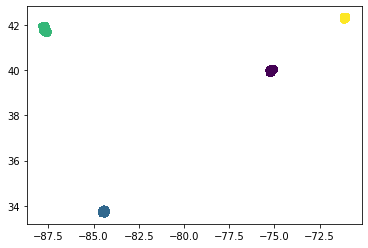

In [30]:
# show cluseters -- 4 different cities
plt.scatter(train.Longitude, train.Latitude, c= train.geo_cluster)

We have much more intersection data for city 2 and 3, less for city 0 and 1

In [31]:
print("number of data for each city: ",train.groupby("geo_cluster")["IntersectionId"].aggregate("count"))
print("number of unique intersection for each city: ",train.groupby("geo_cluster")["IntersectionId"].aggregate(lambda x: len(x.unique())))

number of data for each city:  geo_cluster
0    388322
1    153363
2    133674
3    182050
Name: IntersectionId, dtype: int64
number of unique intersection for each city:  geo_cluster
0    1317
1     377
2    2129
3     973
Name: IntersectionId, dtype: int64


## clusters within the city

can we try to cluster the intersections within the same city?

* looks like this is hard to determine the number of clusters we should use. But we can try different number of clusters later
* future use of this feature: this feature might be helpful to determine the potential traffic of other unseen intersections based on their cluster of the streets. (Alternatively, we can use k-nearest-neighbors for predictions of unseen intersections)

* city 0: Chicago
* city 1: Philadelphia
* city 2: Atlanta
* city 3: Boston

/Library/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



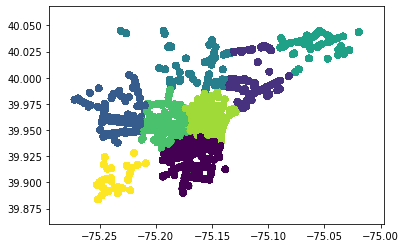

In [32]:
# Chicago
city0 = train[train["geo_cluster"] == 0]
geo_info_city0 = city0[["Longitude", "Latitude"]]
kmeans_city0  = KMeans(n_clusters=8).fit(geo_info_city0)
city0["street_cluster"] = kmeans_city0.labels_
plt.scatter(city0.Longitude, city0.Latitude, c = city0["street_cluster"])
#plt.title = "city 0 streets clusters"

/Library/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



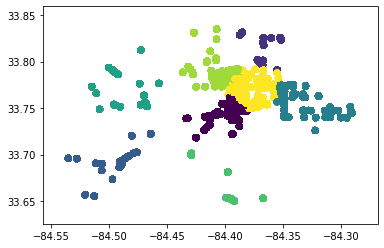

In [33]:
# Philadelphia
city1 = train[train["geo_cluster"] == 1]
geo_info_city1 = city1[["Longitude", "Latitude"]]
kmeans_city1  = KMeans(n_clusters=8).fit(geo_info_city1)
city1["street_cluster"] = kmeans_city1.labels_
plt.scatter(city1.Longitude, city1.Latitude, c = city1["street_cluster"])

/Library/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



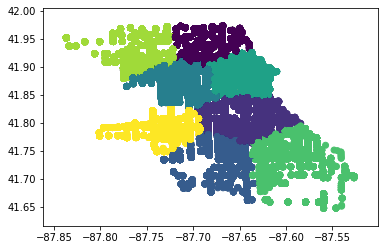

In [34]:
# Atlanta
city2 = train[train["geo_cluster"] == 2]
geo_info_city2 = city2[["Longitude", "Latitude"]]
kmeans_city2 = KMeans(n_clusters=8).fit(geo_info_city2)
city2["street_cluster"] = kmeans_city2.labels_
plt.scatter(city2.Longitude, city2.Latitude, c = city2["street_cluster"])

/Library/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



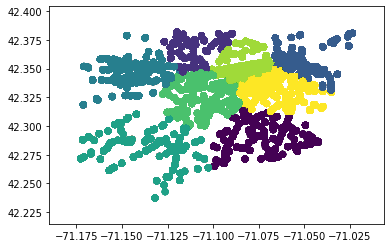

In [35]:
# Boston
city3= train[train["geo_cluster"] == 3]
geo_info_city3 = city3[["Longitude", "Latitude"]]
kmeans_city3 = KMeans(n_clusters=8).fit(geo_info_city3)
city3["street_cluster"] = kmeans_city3.labels_
plt.scatter(city3.Longitude, city3.Latitude, c = city3["street_cluster"])

## Hours to traffic
For each city, let's look at the average total waiting time (50th percentile) by hours

city 0 at hour 0


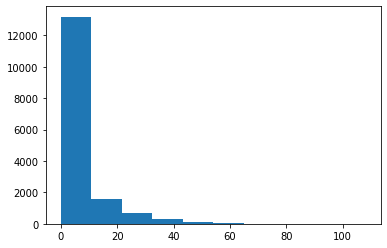

city 0 at hour 1


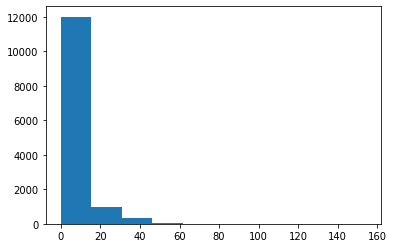

city 0 at hour 2


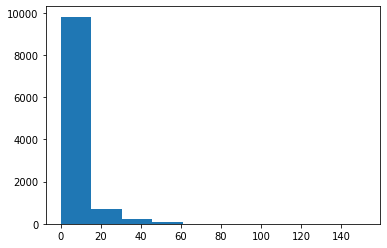

city 0 at hour 3


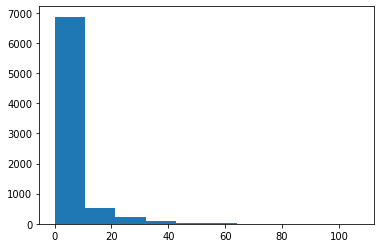

city 0 at hour 4


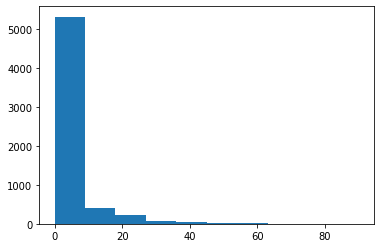

city 0 at hour 5


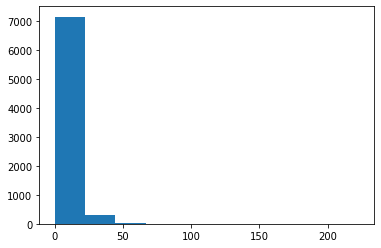

city 0 at hour 6


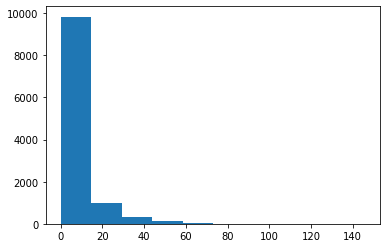

city 0 at hour 7


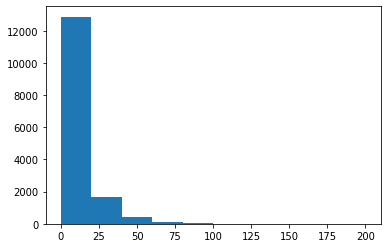

city 0 at hour 8


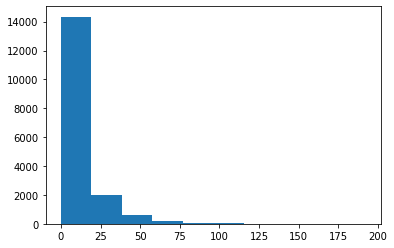

city 0 at hour 9


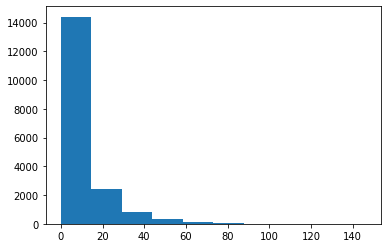

city 0 at hour 10


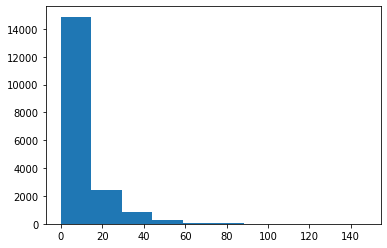

city 0 at hour 11


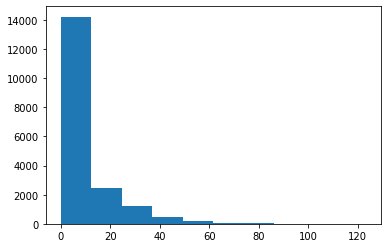

city 0 at hour 12


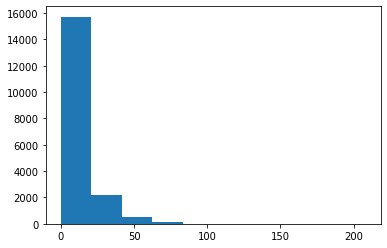

city 0 at hour 13


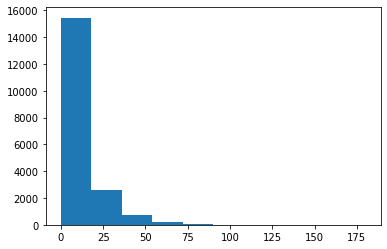

city 0 at hour 14


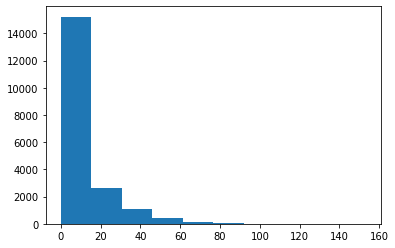

city 0 at hour 15


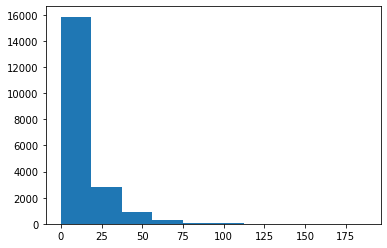

city 0 at hour 16


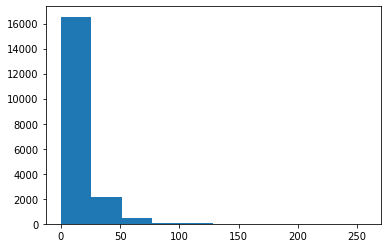

city 0 at hour 17


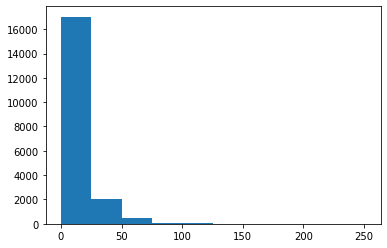

city 0 at hour 18


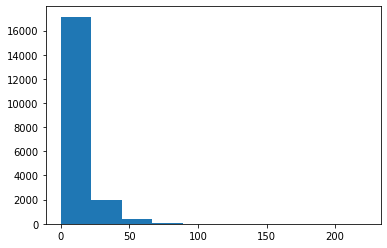

city 0 at hour 19


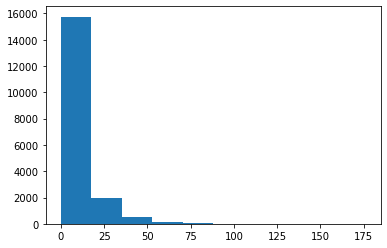

city 0 at hour 20


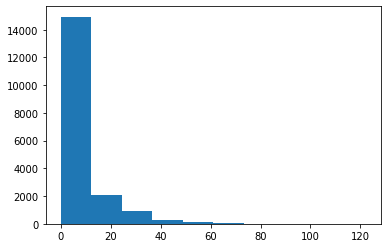

city 0 at hour 21


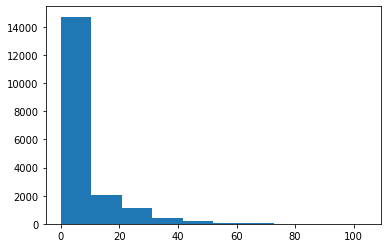

city 0 at hour 22


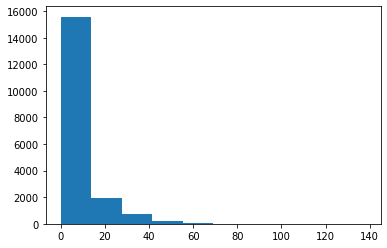

city 0 at hour 23


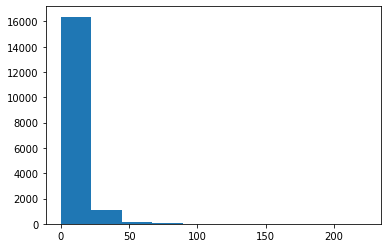

In [36]:
for i in range(24):
    wait_times_0 = train[(train["geo_cluster"] == 0) & (train["Hour"] == i)]["TotalTimeStopped_p50"]
    plt.hist(wait_times_0)
    print('city 0 at hour '+str(i))
    plt.show()

It seems like even with the separation of time, the data is highly unbalanced. So let's try to find the busy street first. By busy, for now we define it as TotalTimeStopped_p20 > 5 and TotalTimeStopped_p50 > 10. 

In [37]:
# helper function for easy visualization later
def busy_streets(city, features_req):
    busy_city = train[(train.geo_cluster == city)]
    for k, v in features_req.items():
        busy_city = busy_city[busy_city[k] > v]
    #print(busy_city.shape)
    print("number of unique busy intercestions in city {} : {}".format(city, len(busy_city.IntersectionId.unique())))
    return busy_city

def busy_streets_by_hour(city, features_req):
    busy_city=busy_streets(city, features_req)
    ls = (busy_city.groupby("Hour")["IntersectionId"].aggregate(lambda ls: len(ls.unique())))
    #print(ls)
    plt.plot(ls, label = "city "+str(city))
    return ls

Separated by hour, how many (unique) intersections are busy?

- suprisingly, even in the mid-night we see streets that are busy

* city 0: Chicago
* city 1: Philadelphia
* city 2: Atlanta
* city 3: Boston

number of unique busy intercestions in city 0 : 971
number of unique busy intercestions in city 0 : 971
number of unique busy intercestions in city 1 : 323
number of unique busy intercestions in city 1 : 323
number of unique busy intercestions in city 2 : 1198
number of unique busy intercestions in city 2 : 1198
number of unique busy intercestions in city 3 : 679
number of unique busy intercestions in city 3 : 679


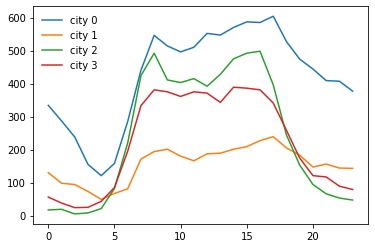

In [38]:
req = {"TotalTimeStopped_p20":5, "TotalTimeStopped_p50":10}
for city in range(4):
    busy_streets(city, req)
    streets = busy_streets_by_hour(city, req)
plt.legend(loc='upper left', frameon=False)

Now we are seeing some differences in cities! City 3 is clearly the busiest at all time. This also corresponds to our observation that we have much more intersection data for city 3 and 2 than city 0 and 1.

Try a more strict definition of "busy", this time we restrict it to be have at least 30 minutes waiting time on average (total wait time 50th percentile > 30)
   - Some interesting observations from the following data and chart:
       - even though for city 0 we only have 973 unique intersections in our data, we see in its peak time, about 1/3 of its intersections are busy. And for city 1 we only have 377, at its peak time about half of them are busy
       - now that we have a stricter definition of 'busy', the number of busy streets are actually getting closer to each other despite the number of total intersections in that city

number of unique busy intercestions in city 0 : 694
number of unique busy intercestions in city 0 : 694
number of unique busy intercestions in city 1 : 291
number of unique busy intercestions in city 1 : 291
number of unique busy intercestions in city 2 : 692
number of unique busy intercestions in city 2 : 692
number of unique busy intercestions in city 3 : 569
number of unique busy intercestions in city 3 : 569


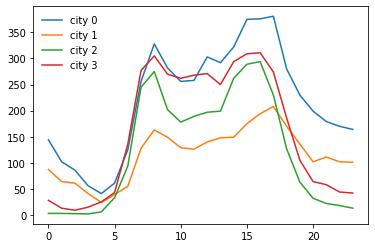

In [39]:
req = {"TotalTimeStopped_p20":5, "TotalTimeStopped_p50":30}
for city in range(4):
    busy_streets(city, req)
    streets = busy_streets_by_hour(city, req)
plt.legend(loc='upper left', frameon=False)

In [40]:
city0 = train[train["geo_cluster"] == 0]
city0_busy = city0[city0["TotalTimeStopped_p50"] > 30]
city0_busy_morning = city0_busy[(city0_busy["Hour"] >= 6) & (city0_busy["Hour"] < 12)]
city0_busy_afternoon = city0_busy[(city0_busy["Hour"] >= 12) & (city0_busy["Hour"] < 18)]
city0_busy_night = city0_busy[(city0_busy["Hour"] >= 18) & (city0_busy["Hour"] <= 23)]
city0_busy_latenight = city0_busy[(city0_busy["Hour"] >= 0) & (city0_busy["Hour"] < 6)]
# or use day/night?
city0_busy_d = city0_busy[(city0_busy["Hour"] >= 6) & (city0_busy["Hour"] < 20)]
city0_busy_n = city0_busy[(city0_busy["Hour"] >= 20) | (city0_busy["Hour"] < 5)]


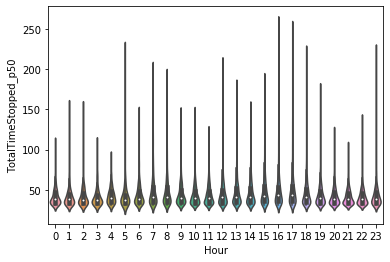

In [41]:
sns.violinplot(x="Hour" ,y="TotalTimeStopped_p50", data = city0_busy)

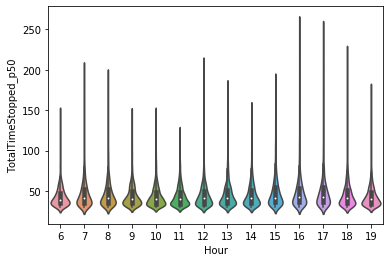

In [42]:
sns.violinplot(x="Hour" ,y="TotalTimeStopped_p50", data = city0_busy_d)

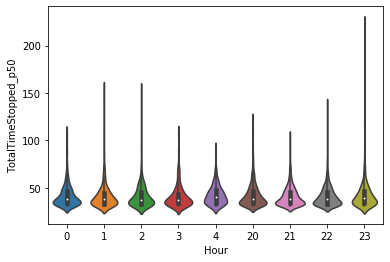

In [43]:
sns.violinplot(x="Hour" ,y="TotalTimeStopped_p50", data = city0_busy_n)

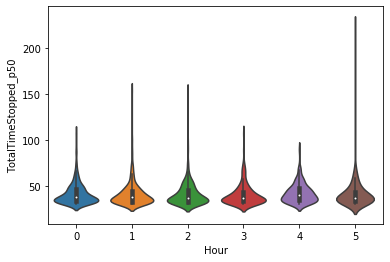

In [44]:
sns.violinplot(x="Hour" ,y="TotalTimeStopped_p50", data = city0_busy_latenight)

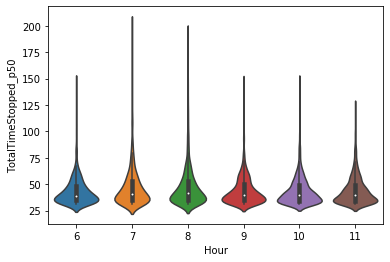

In [45]:
sns.violinplot(x="Hour" ,y="TotalTimeStopped_p50", data = city0_busy_morning)

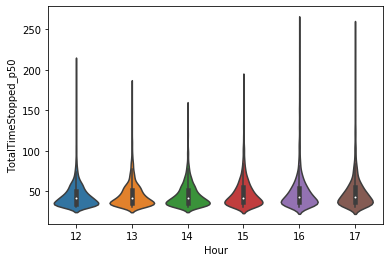

In [46]:
sns.violinplot(x="Hour" ,y="TotalTimeStopped_p50", data = city0_busy_afternoon)

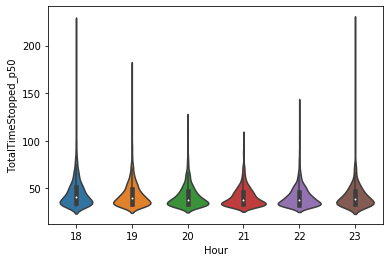

In [47]:
sns.violinplot(x="Hour" ,y="TotalTimeStopped_p50", data = city0_busy_night)

## time from first stop, distance from first stop, total stop time
in this part, we try to understand the relationship between time from first stop, distance from first stop, and our total stop time
* first let's look at the correlation matrix
* the time from first stop is almost perfectly correlated to the total stop time
* the distance from first stop is has a correlation coefficient of ~0.6, which indicates strong correlation as well
* the number of entry street is almost perfectly correlated to number of exits streets, that's not surprising

In [48]:
corr = train.iloc[:,11:-1].corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

### Visualize the busy intersections on Map

In [49]:
train.City.unique()

array(['Atlanta', 'Boston', 'Chicago', 'Philadelphia'], dtype=object)

In [50]:
train.iloc[0,:]

RowId                                                                1920335
IntersectionId                                                             0
Latitude                                                             33.7917
Longitude                                                             -84.43
EntryStreetName                                 Marietta Boulevard Northwest
ExitStreetName                                  Marietta Boulevard Northwest
EntryHeading                                                              NW
ExitHeading                                                               NW
Hour                                                                       0
Weekend                                                                    0
Month                                                                      6
Path                       Marietta Boulevard Northwest_NW_Marietta Boule...
TotalTimeStopped_p20                                                       0

In [51]:
# plot 24 hour non-zero avg stop times of a city
def plot_24_hours(city_name, least_avg_stop_time = 0):
    city = train[train.City == city_name]
    for i in range(24):
        df = city[(city["Hour"] == i) & (city["TotalTimeStopped_p50"] > least_avg_stop_time)]
        geometry = [Point(xy) for xy in zip(df.Longitude, df.Latitude)]
        gdf= gpd.GeoDataFrame(df, geometry=geometry)
        print(city_name + " hour "+str(i))
        gdf.plot(column = "TotalTimeStopped_p50", legend=True)
        plt.show()

Atlanta hour 0


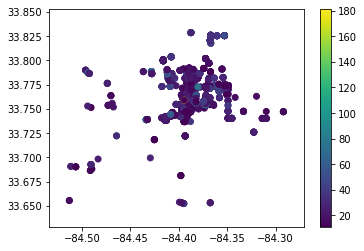

Atlanta hour 1


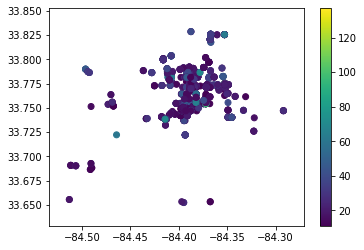

Atlanta hour 2


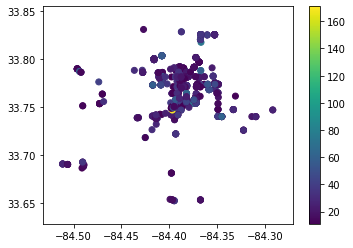

Atlanta hour 3


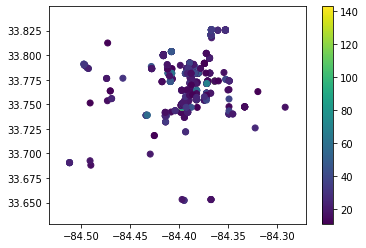

Atlanta hour 4


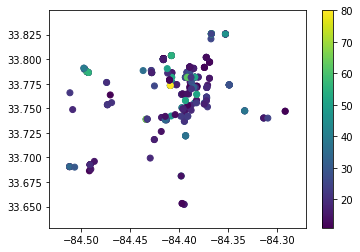

Atlanta hour 5


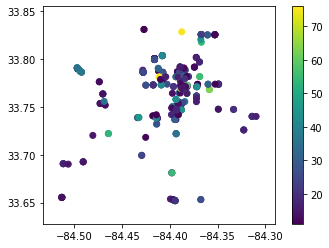

Atlanta hour 6


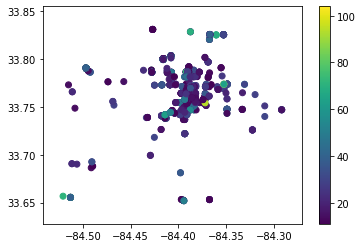

Atlanta hour 7


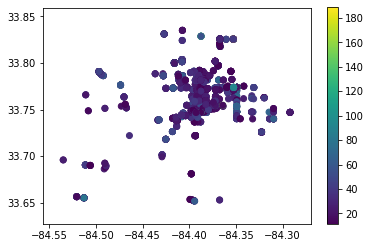

Atlanta hour 8


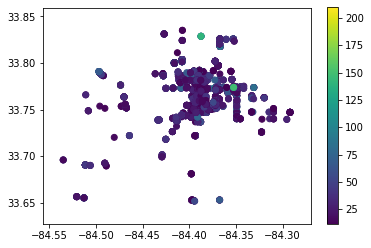

Atlanta hour 9


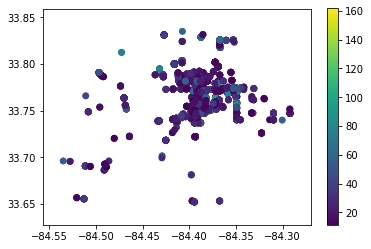

Atlanta hour 10


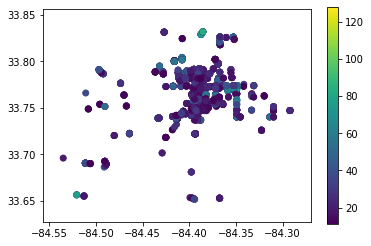

Atlanta hour 11


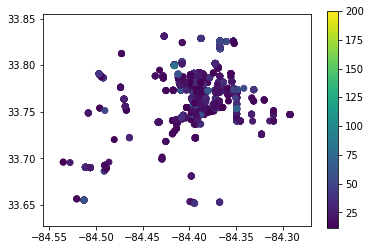

Atlanta hour 12


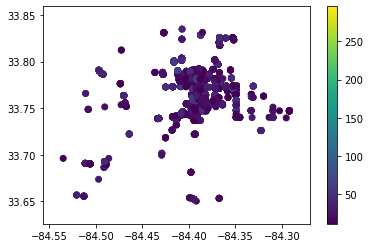

Atlanta hour 13


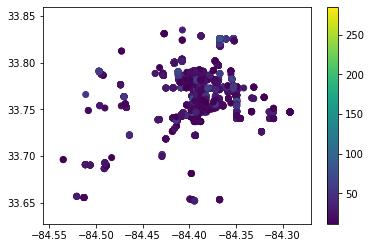

Atlanta hour 14


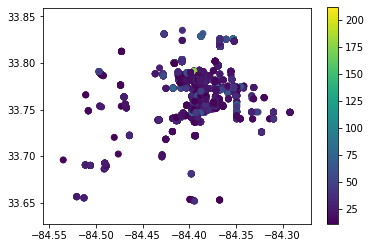

Atlanta hour 15


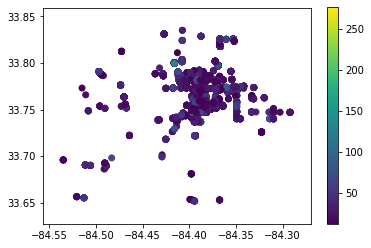

Atlanta hour 16


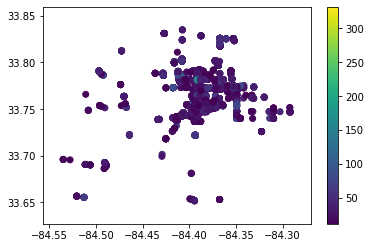

Atlanta hour 17


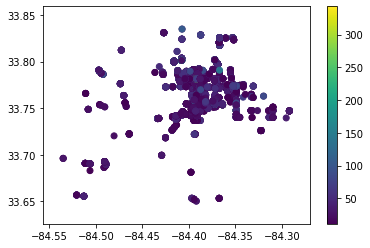

Atlanta hour 18


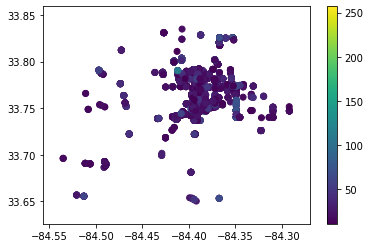

Atlanta hour 19


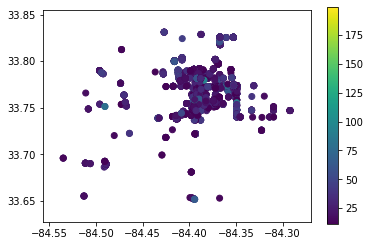

Atlanta hour 20


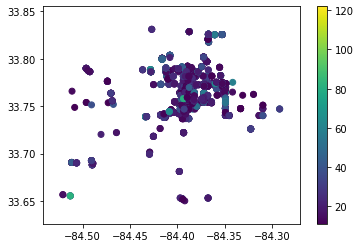

Atlanta hour 21


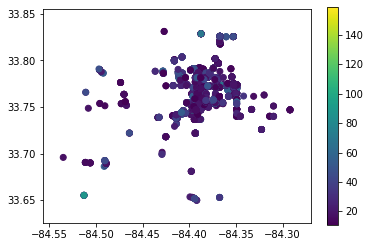

Atlanta hour 22


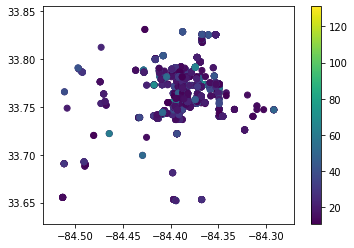

Atlanta hour 23


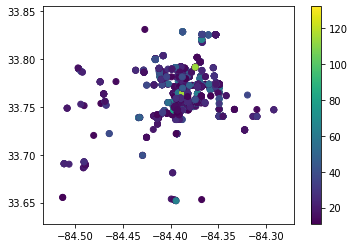

In [52]:
plot_24_hours("Atlanta", 10) # plot intersections that have at least 10mins avg total wait time

In [53]:
train.snowfall.unique()

array([0, 0.1, 0.3, 0.2, 0.4], dtype=object)

## map visualization

In [54]:
train.City.unique()

array(['Atlanta', 'Boston', 'Chicago', 'Philadelphia'], dtype=object)

### Atlanta

In [56]:
TotalTimeStopped=train.groupby(['City','Latitude','Longitude'])['TotalTimeStopped_p80'].mean().reset_index()


In [57]:
fig = px.scatter_mapbox(TotalTimeStopped[TotalTimeStopped["City"]=='Atlanta'], 
                        lat="Latitude", lon="Longitude",size="TotalTimeStopped_p80",size_max=12,
                        color="TotalTimeStopped_p80", color_continuous_scale=px.colors.sequential.YlOrBr, zoom=11)
fig.update_layout(mapbox_style="stamen-terrain")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})

fig.show()

### Boston

In [58]:
TotalTimeStopped=train.groupby(['City','Latitude','Longitude'])['TotalTimeStopped_p80'].mean().reset_index()

fig = px.scatter_mapbox(TotalTimeStopped[TotalTimeStopped["City"]=='Boston'], 
                        lat="Latitude", lon="Longitude",size="TotalTimeStopped_p80",size_max=12,
                        color="TotalTimeStopped_p80", color_continuous_scale=px.colors.sequential.YlOrBr, zoom=11)
fig.update_layout(mapbox_style="stamen-terrain")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})

fig.show()

### Chicago

In [59]:
TotalTimeStopped=train.groupby(['City','Latitude','Longitude'])['TotalTimeStopped_p80'].mean().reset_index()

fig = px.scatter_mapbox(TotalTimeStopped[TotalTimeStopped["City"]=='Chicago'], 
                        lat="Latitude", lon="Longitude",size="TotalTimeStopped_p80",size_max=12,
                        color="TotalTimeStopped_p80", color_continuous_scale=px.colors.sequential.YlOrBr, zoom=11)
fig.update_layout(mapbox_style="stamen-terrain")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})

fig.show()

### Philadelphia

In [60]:
fig = px.scatter_mapbox(TotalTimeStopped[TotalTimeStopped["City"]=='Philadelphia'], 
                        lat="Latitude", lon="Longitude",size="TotalTimeStopped_p80",size_max=12,
                        color="TotalTimeStopped_p80", color_continuous_scale=px.colors.sequential.YlOrBr, zoom=11)
fig.update_layout(mapbox_style="stamen-terrain")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})

fig.show()

It seems to have some relationship to its distance to downtown area, add distance to downtown as a feature to see if it changes anything

### Add distance to downtown

* Atlanta: 33.7557° N, 84.3884° W
* Boston: 42.3557° N, 71.0572° W
* Chicago: 41.8781° N, 87.6298° W
* Philadelphia: 39.9547° N, 75.1628° W


In [61]:
downtown = {"Atlanta": (33.7557, -84.3884), "Boston": (42.3557, -71.0572),
           "Chicago": (41.8781, -87.6298), "Philadelphia": (39.9547, -75.1628)}

def distance_to_downtown(city, lat, lon):
    c_lat, c_lon = downtown[city]
    return np.sqrt((lat - c_lat)**2 + (lon - c_lon)**2)

In [62]:
train["distance_downtown"] = train[["City", "Latitude", "Longitude"]].apply(lambda x: distance_to_downtown(*x), axis=1)

In [63]:
len(train["distance_downtown"].unique())

4795

## Street Name to Street Size
after a short search on Google, we find the different meaning of road type names.

"a ‘road’ is anything that connects two points, while ‘streets’ are public ways which have buildings on either side. Avenues, meanwhile, have the same attributes as streets but run perpendicular to them, while a boulevard is essentially a wide street (or avenue), with a median through the middle. A lane is, predictably, smaller."

So from the street name, we want to infer and encode its size

In [64]:
print("number of 'street' in street names",sum(train.EntryStreetName.apply(lambda x: "street" in x.lower())))
print("number of 'avenue' in street names",sum(train.EntryStreetName.apply(lambda x: "avenue" in x.lower())))
print("number of 'boulevard' in street names",sum(train.EntryStreetName.apply(lambda x: "boulevard" in x.lower())))
print("number of 'broad' in street names",sum(train.EntryStreetName.apply(lambda x: "broad" in x.lower())))
print("number of 'lane' in street names",sum(train.EntryStreetName.apply(lambda x: "lane" in x.lower())))

number of 'street' in street names 390300
number of 'avenue' in street names 287686
number of 'boulevard' in street names 48072
number of 'broad' in street names 33268
number of 'lane' in street names 525


In [65]:
road_encoding = {
    'Lane': 1,
    'Road': 1,
    'Street': 2,
    'Avenue': 2,
    'Drive': 2.5,
    'Broad': 2.5,
    'Boulevard': 3
}

def encode_road_type(road):
    t = 1
    for r in road_encoding.keys():
        if r in road:
            t = road_encoding[r]
    return t

In [66]:
train["entry_road_type"] = train.EntryStreetName.apply(encode_road_type)
train["exit_road_type"] = train.ExitStreetName.apply(encode_road_type)

In [ ]:
#train["hour_str"] = train.Hour.apply(lambda x: str(x))

# Part 2: searching for models

tried baseline for:
* Linear Regression
* KNN
* Gradient Boosting

more ...?

In [ ]:
train.columns

In [67]:
cols = ["IntersectionId", "Latitude", "Longitude", "geo_cluster", "Hour", "Weekend", "Month", 
        "count_entry_streets", "count_exit_streets", 'EntryHeadingNS', 'EntryHeadingWE', 
        'ExitHeadingNS', 'ExitHeadingWE', "precipitation", "snowfall","distance_downtown", 
        "entry_road_type", "exit_road_type"]
cols2 = ["IntersectionId", "Latitude", "Longitude", "geo_cluster", "Hour", "Weekend", "Month", 
        "count_entry_streets", "count_exit_streets", 'EntryHeadingNS', 'EntryHeadingWE', 
        'ExitHeadingNS', 'ExitHeadingWE',"distance_downtown","entry_road_type", "exit_road_type"]
X = train[cols]
X2 = train[cols2]
y = train["TotalTimeStopped_p50"]

In [68]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.20)
X_train2, X_valid2, y_train2, y_valid2 = train_test_split(X2, y, test_size=0.20)

In [69]:
X_train = ss.fit_transform(X_train)
X_valid = ss.fit_transform(X_valid)
# standardization

Linear Regression

In [70]:
reg = linear_model.LinearRegression()
reg.fit(X_train, y_train)
reg_y_pred = reg.predict(X_valid)
print("mean squared error :",mean_squared_error(y_valid, reg_y_pred))
print("mean absolute error :",mean_absolute_error(y_valid, reg_y_pred))
print("max error :",max_error(y_valid, reg_y_pred))

mean squared error : 227.94873314741395
mean absolute error : 10.092818783893774
max error : 301.2017453146949


In [72]:
reg = linear_model.LinearRegression()
reg.fit(X_train2, y_train2)
reg_y_pred2 = reg.predict(X_valid2)
print("mean squared error :",mean_squared_error(y_valid2, reg_y_pred2))
print("mean absolute error :",mean_absolute_error(y_valid2, reg_y_pred2))
print("max error :",max_error(y_valid2, reg_y_pred2))

mean squared error : 231.44349031078852
mean absolute error : 10.11540400797038
max error : 321.89643650674867


KNN

In [73]:
# fit KNN
knn_classifiers = []
knn_mse = []
knn_abe = []
knn_mxe = []
knn_mse_tr = []
knn_abe_tr = []
knn_mxe_tr = []
for weights in ["uniform"]:
    for n_neighbors in range(1, 9):
        classifier = KNeighborsRegressor(n_neighbors=n_neighbors, weights = weights)
        classifier.fit(X_train, y_train)
        knn_classifiers.append(classifier)
        
        # train error
        y_tr= classifier.predict(X_train)
        mse_tr, abe_tr, mxe_tr = mean_squared_error(y_train, y_tr),mean_absolute_error(y_train, y_tr),max_error(y_train, y_tr)
        knn_mse_tr.append(mse_tr)
        knn_abe_tr.append(abe_tr)
        knn_mxe_tr.append(mxe_tr)
        
        # validation error
        y_pred= classifier.predict(X_valid)
        mse, abe, mxe = mean_squared_error(y_valid, y_pred),mean_absolute_error(y_valid, y_pred),max_error(y_valid, y_pred)
        knn_mse.append(mse)
        knn_abe.append(abe)
        knn_mxe.append(mxe)
        print("K = {}, weights = {}".format(n_neighbors, weights))
        print("mean squared error :",mean_squared_error(y_valid, y_pred))
        print("mean absolute error :",mean_absolute_error(y_valid, y_pred))
        print("max error :",max_error(y_valid, y_pred))

K = 1, weights = uniform
mean squared error : 278.73461354544503
mean absolute error : 8.445708587490232
max error : 265.0
K = 2, weights = uniform
mean squared error : 211.9448309443557
mean absolute error : 7.905762703957267
max error : 251.5
K = 3, weights = uniform
mean squared error : 194.8812282209082
mean absolute error : 7.8504391131430715
max error : 271.0


KeyboardInterrupt: 

In [ ]:
knn_mse = [278.7346, 211.9448, 194.8812, 148.8845, 147.6704, 147.8168, 148.2535, 149.0060]
knn_mae = [8.4457, 7.9058, 7.8504, 6.5754, 6.6801, 6.7930, 6.8909, 6.9815]
knn_mxe = [265, 251.5, 271.0, 278.25, 282.8, 275.1666, 278.8571, 279.375]

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111)
x = [1/i for i in range(1,9)]
ax.plot(x, knn_mse, label = "validation mean squared error", color='lightblue', linewidth=3)
#ax.plot(range(4,9), knn_mse_tr, label = "training mean squared error", color='blue', linewidth=3)

plt.legend()
plt.show()

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(x, knn_mae, label = "validation mean absolute error", color='lightgreen', linewidth=3)
#ax.plot(x, knn_mae_tr, label = "training mean absolute error", color='green', linewidth=3)

plt.legend()
plt.show()

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(x, knn_mxe, label = "validation max error", color='red', linewidth=3)
#ax.plot(x, knn_mxe_tr, label = "training max error", color='orange', linewidth=3)
plt.legend()
plt.show()

### grid search for knn

In [ ]:
grid_params = {'neightbors':[3,4,5,6],
              'weights':["uniform", "distance"],
              'metric':["euclidean", "manhattan"]}
gs = GridSearchCV(KNeighborsRegressor(), grid_params, verbose = 1, cv = 3, n_jobs=-1)
gs_results = gs.fit(X) # since we use cross validation use all data

In [ ]:
print(gs_results.best_score_)
print(gs_results.best_estimator_)
print(gs_results.best_params_)

## Gradient Boosting

In [74]:
# with weather data
gbr = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1,
                          max_depth=3, random_state=0, loss='ls').fit(X_train, y_train)
gbr_y_pred = gbr.predict(X_valid)
print("mean squared error :",mean_squared_error(y_valid, gbr_y_pred))
print("mean absolute error :",mean_absolute_error(y_valid, gbr_y_pred))
print("max error :",max_error(y_valid, gbr_y_pred))

mean squared error : 214.08143691110013
mean absolute error : 9.554079563167994
max error : 299.6163476002468


In [78]:
13%2

1

In [76]:
print("mean percentage error :",np.mean((gbr_y_pred - y_valid)/(y_valid + 0.1)))

mean percentage error : 45.46441759992177


In [75]:
for col, i in zip(cols, gbr.feature_importances_):
    print("{} : {}".format(col, i))

IntersectionId : 0.056892901777107
Latitude : 0.10764170314034995
Longitude : 0.062356350124107174
geo_cluster : 0.012490016307484047
Hour : 0.20740442857971425
Weekend : 0.08091497060353578
Month : 0.0012850700223486567
count_entry_streets : 0.11009800351119146
count_exit_streets : 0.10275316286045434
EntryHeadingNS : 0.04145967351953482
EntryHeadingWE : 0.019571980892279076
ExitHeadingNS : 0.01191041181183069
ExitHeadingWE : 0.010336900453906695
precipitation : 0.0
snowfall : 0.0
distance_downtown : 0.09590771717423832
entry_road_type : 0.02727984600172859
exit_road_type : 0.05169686322018918


In [ ]:
# without weather data
gbr2 = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1,
                          max_depth=3, random_state=0, loss='ls').fit(X_train2, y_train2)
gbr_y_pred2 = gbr2.predict(X_valid2)
print("mean squared error :", mean_squared_error(y_valid2, gbr_y_pred2))
print("mean absolute error :", mean_absolute_error(y_valid2, gbr_y_pred2))
print("max error :", max_error(y_valid2, gbr_y_pred2))

In [ ]:
for col, i in zip(cols2, gbr2.feature_importances_):
    print("{} : {}".format(col, i))

PCA

In [ ]:
pca = PCA(n_components=5, random_state=5)
PCs = pd.DataFrame(pca.fit_transform(X)) # principal components

In [ ]:
pca.explained_variance_ratio_

Random Forest

In [ ]:
test.columns

In [ ]:
train[train.IntersectionId == 1]

In [ ]:
test.head()